# **REVERSÃO DA DIFERENCIAÇÃO NAS PREVISÕES**

In [1]:
import numpy as np
import pandas as pd

In [2]:
##### Abertura do arquivo de Séries Temporais Air Passengers
dados = pd.read_csv('AirPassengers.csv',
                    sep=',')

In [3]:
###### Leitura do arquivo Air Passengers
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

**ESTACIONARIDADE**

In [5]:
import matplotlib.pyplot as plt

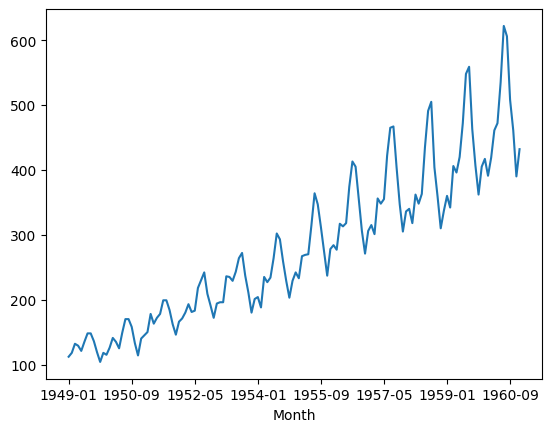

In [6]:
serie.plot()
plt.show()

In [7]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionária:  **estatística do teste > valor crítico**.

Ho = é estacionária: **estatística do teste < valor crítico**


In [8]:
kpss = statsmodels.tsa.stattools.kpss(serie)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6513
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/var/folders/gt/rtqg_w150cjfswljghbp3d5r0000gp/T/ipykernel_46265/446151726.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie)


**DIFERENCIAÇÃO**

In [9]:
serie_diferenciada = serie.diff()
serie_diferenciada

Month
1949-01     NaN
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 144, dtype: float64

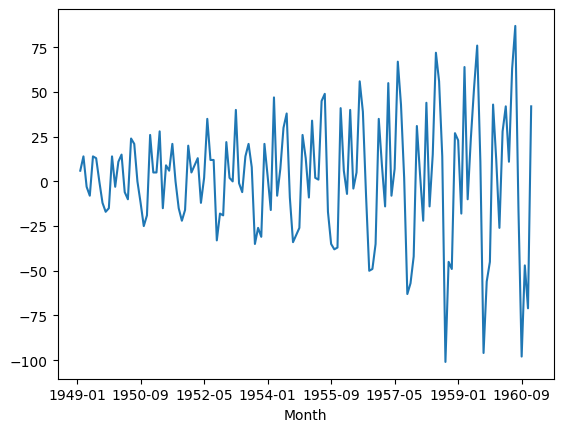

In [10]:
serie_diferenciada.plot()
plt.show()

In [11]:
#Vai dar erro de Nan aqui
# kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)
# print('Estatítica do teste: {:.4f}'.format(kpss[0]))
# print('p_valor: {:.4f}'.format(kpss[1]))
# print('Valores Críticos:')
# for chave, valor in kpss[3].items():
#    print('{}: {:.4f}'.format(chave, valor))

In [12]:
serie_diferenciada = serie_diferenciada.drop(index = serie_diferenciada.index[0])

In [13]:
serie_diferenciada

Month
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
1949-06    14.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 143, dtype: float64

In [14]:
kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0239
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/var/folders/gt/rtqg_w150cjfswljghbp3d5r0000gp/T/ipykernel_46265/105099515.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie_diferenciada)


## **REVERSÃO DA DIFERENCIAÇÃO**

**Criando o modelo**

In [15]:
from pmdarima.arima import auto_arima

In [16]:
modelo_auto = auto_arima(serie_diferenciada, trace = True, stepwise = False, seasonal=True, max_p=8, max_q=8,
                          max_P=3, max_Q=3, start_p=0, start_q=0, start_P=0, start_Q=0, m=6)

 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[6] intercept   : AIC=1416.929, Time=0.06 sec
 ARIMA(0,0,0)(0,0,2)[6] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,3)[6] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(1,0,0)[6] intercept   : AIC=1416.265, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[6] intercept   : AIC=1360.351, Time=0.09 sec
 ARIMA(0,0,0)(1,0,2)[6] intercept   : AIC=1276.747, Time=0.26 sec
 ARIMA(0,0,0)(1,0,3)[6] intercept   : AIC=1253.148, Time=0.74 sec
 ARIMA(0,0,0)(2,0,0)[6] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(2,0,1)[6] intercept   : AIC=1156.674, Time=0.19 sec
 ARIMA(0,0,0)(2,0,2)[6] intercept   : AIC=1156.780, Time=0.23 sec
 ARIMA(0,0,0)(2,0,3)[6] intercept   : AIC=1158.659, Time=0.51 sec
 ARIMA(0,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(3,0,1)[6] intercept   : AIC=1158.286, Time=0.56 sec
 ARIMA(0,0,0)(3,0,2)[6] intercept   : AIC=1158.731, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[6] interc

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(3,0,0)[6] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  Fil

 ARIMA(2,0,0)(3,0,0)[6] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(0,0,0)[6] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,1)[6] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,2)[6] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(1,0,0)[6] intercept   : AIC=1360.311, Time=0.17 sec
 ARIMA(2,0,1)(1,0,1)[6] intercept   : AIC=1289.000, Time=0.28 sec
 ARIMA(2,0,1)(2,0,0)[6] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=1343.776, Time=0.37 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=1323.716, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[6] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[6] intercept   : AIC=1396.151, Time=0.06 sec
 ARIMA(3,0,0)(0,0,1)[6] intercept   : AIC=1396.043, Time=0.10 sec
 ARIMA(3,0,0)(0,0,2)[6] intercept   : AIC=1294.529, Time=0.25 sec
 ARIMA(3,0,0)(1,0,0)[6] intercept   : AIC=1389.229, Time=0.22 sec
 ARIMA(3,0,0)(1,0,1)[6] intercept   : AIC=1321

In [17]:
resultado_auto = modelo_auto.fit(serie_diferenciada)
print(resultado_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(0, 0, 3)x(2, 0, [], 6)   Log Likelihood                -565.885
Date:                            Mon, 15 Apr 2024   AIC                           1145.769
Time:                                    20:33:33   BIC                           1166.509
Sample:                                02-01-1949   HQIC                          1154.197
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1145      0.505      0.227      0.821      -0.875       1.104
ma.L1         -0.3310      0.076   

In [18]:
previsao_auto = resultado_auto.predict(n_periods=24)
previsao_auto

1961-01-01     9.762154
1961-02-01   -18.496740
1961-03-01    30.917476
1961-04-01    40.756941
1961-05-01    11.517266
1961-06-01    59.624606
1961-07-01    82.918369
1961-08-01   -14.897989
1961-09-01   -93.700335
1961-10-01   -45.213336
1961-11-01   -67.712784
1961-12-01    39.379306
1962-01-01     8.348639
1962-02-01   -17.324425
1962-03-01    30.796264
1962-04-01    39.548949
1962-05-01    11.967861
1962-06-01    56.440979
1962-07-01    79.045948
1962-08-01   -13.862680
1962-09-01   -89.600249
1962-10-01   -43.494648
1962-11-01   -64.585172
1962-12-01    36.922347
Freq: MS, dtype: float64

**Reversão**

In [19]:
# Usando o último elemento da série não diferenciada e somando com o primeiro elemento da previsão
s = serie[len(serie)-1]+previsao_auto[0]
s

441.7621535183015

In [20]:
c = 1   # contador
previsao_revertida = [s]   # lista para incluir resultados da previsão revertida
while c < len(previsao_auto): #contagem irá de 1 até uma unidade menor que a quantidade total de previsões
    s = s + previsao_auto[c]  #somando o último valor de s com o próximo valor da previsão
    previsao_revertida.append(s)        #incluindo resultados na lista da previsão revertida
    c = c + 1

In [21]:
previsao_revertida = pd.DataFrame(previsao_revertida)
previsao_revertida

,0
0,441.762154
1,423.265414
2,454.182889
3,494.939830
4,506.457096
5,566.081702
6,649.000071
7,634.102082
8,540.401747
9,495.188411


In [22]:
seriecomprevisao = pd.concat([serie, previsao_revertida], axis=0,ignore_index=True)
seriecomprevisao

,0
0,112.000000
1,118.000000
2,132.000000
3,129.000000
4,121.000000
...,...
163,661.816469
164,572.216219
165,528.721571
166,464.136399


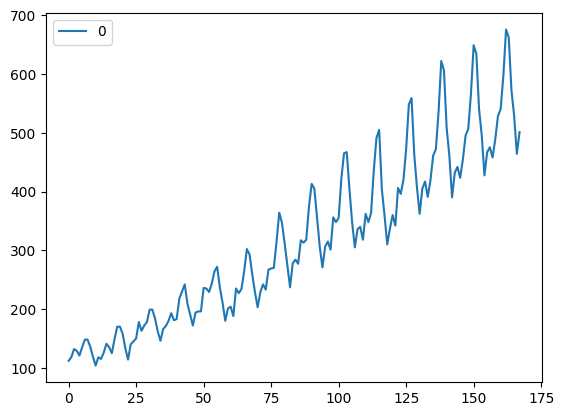

In [23]:
seriecomprevisao.plot()
plt.show()

In [24]:
previsao_revertida.index = range(144, len(previsao_revertida) + 144)
previsao_revertida

,0
144,441.762154
145,423.265414
146,454.182889
147,494.939830
148,506.457096
149,566.081702
150,649.000071
151,634.102082
152,540.401747
153,495.188411


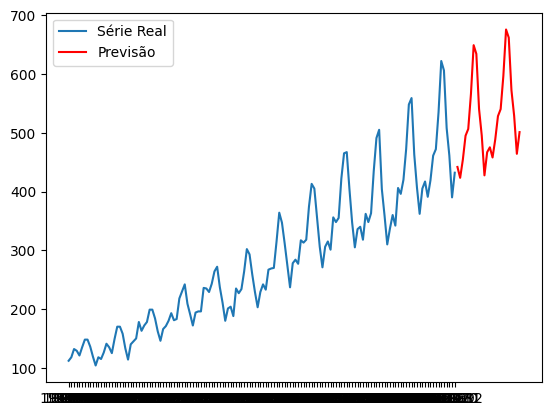

In [25]:
plt.plot(serie, label='Série Real')
plt.plot(previsao_revertida,color='red', label='Previsão')
plt.legend(loc='best')
plt.show()


Referências e links úteis (gratuitos)
Referências Bibliográficas

MORETTIN, Pedro A. Análise de Séries Temporais. São Paulo: Pearson Prentice Hall, 2018.

LARSON, Ron. Estatística Aplicada. São Paulo: Pearson Prentice Hall, 2010.



LINKS ÚTEIS:

https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_arma_0.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

https://www.statsmodels.org/devel/datasets/index.html

https://pt.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/another-simulation-giving-evidence-that-n-1-gives-us-an-unbiased-estimate-of-variance

https://www.inf.ufsc.br/~vera.carmo/Testes_de_Hipoteses/Testes_aderencia.pdf

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html

Repositórios de dados:

http://www.hidrologia.daee.sp.gov.br/

https://www.seade.gov.br/coronavirus/#

https://github.com/seade-R/dados-covid-sp

https://www.seade.gov.br/

https://portal.inmet.gov.br/dadoshistoricos

https://datamarket.com/data/list/?q=   

https://research.cs.aalto.fi/aml/datasets.shtml 

http://archive.ics.uci.edu/ml/index.php

https://www.kaggle.com/datasets 